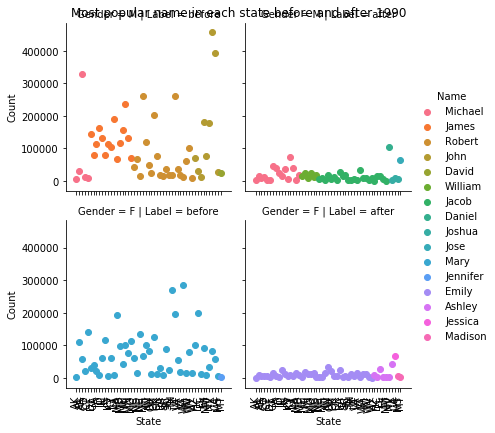

In [2]:
#HW2.1: which name was the most popular in US in each state before and after 1990

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import itertools

main_data_set = '/Users/maryfutey/desktop/classes/python_sem2/HW2/StateNames.csv'
df = pd.read_csv(main_data_set)

time_period = ['before', 'after']
genders = ['M', 'F']
states = list(df['State'].unique())

def splitter(dataset):
    df_list = []
    for gender in genders:
        for times in time_period:
            small_list = []
            if times == 'before':
                frame = df.loc[(df['Gender'] == gender) & (df['Year'] < 1990)]
                for state in states:
                    small_dict = {}
                    df_by_state = frame.loc[df['State'] == state]
                    df1 = df_by_state.groupby(['Name'])['Count'].sum().reset_index()
                    top_count = df1['Count'].max()
                    result = df1[df1['Count'] == top_count]

                    small_dict['Name'] = result.to_dict('r')[0].get('Name')
                    small_dict['Count'] = result.to_dict('r')[0].get('Count')
                    small_dict['State'] = state
                    small_dict['Gender'] = gender
                    small_dict['Label'] = times

                    small_list.append(small_dict)
            else:
                frame = df.loc[(df['Gender'] == gender) & (df['Year'] >= 1990)]
                for state in states:
                    small_dict = {}
                    df_by_state = frame.loc[df['State'] == state]
                    df1 = df_by_state.groupby(['Name'])['Count'].sum().reset_index()
                    top_count = df1['Count'].max()
                    result = df1[df1['Count'] == top_count]

                    small_dict['Name'] = result.to_dict('r')[0].get('Name')
                    small_dict['Count'] = result.to_dict('r')[0].get('Count')
                    small_dict['State'] = state
                    small_dict['Gender'] = gender
                    small_dict['Label'] = times

                    small_list.append(small_dict)
            df_list.append(small_list)
    return df_list

result = splitter(df)
ls1 = list(itertools.chain.from_iterable(result))
names_list = []

for l in ls1:
    if l.get('Name') not in names_list:
        names_list.append(l.get('Name'))

df1 = pd.DataFrame(ls1)

p1 = sns.FacetGrid(df1, col="Label",  row="Gender", hue="Name", hue_order=names_list)
p1 = (p1.map(plt.scatter, "State", "Count").add_legend())
p1.set_xticklabels(rotation=90)
p1.fig.suptitle("Most popular name in each state before and after 1990")
plt.show()




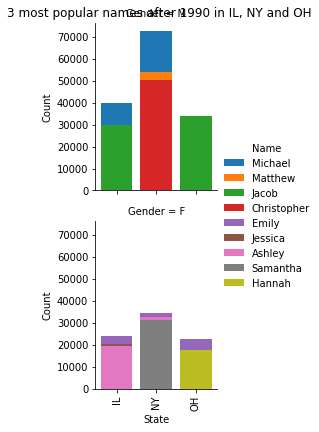

In [7]:
#HW2.2: which are top 3 of the most popular 
#names in 1990-2000 years separately among boys and girls in three states

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

main_data_set = '/Users/maryfutey/desktop/classes/python_sem2/HW2/StateNames.csv'
df = pd.read_csv(main_data_set)

states = ['IL', 'NY', 'OH']
genders = ['M', 'F']

def splitter(dataset):
    df_list = []
    for gender in genders:
        frame = df.loc[(df['Gender'] == gender) & (df['Year'] >= 1990)]
        for state in states:
            df_by_state = frame.loc[df['State'] == state]
            df1 = df_by_state.groupby(['Name'])['Count'].sum().reset_index().nlargest(3, 'Count')
            for d in df1.to_dict('r'):
                d['State'] = state
                d['Gender'] = gender
                df_list.append(d)
    return df_list

ls2 = splitter(df)

names_list = []
for l in ls2:
    if l.get('Name') not in names_list:
        names_list.append(l.get('Name'))

df2 = pd.DataFrame(ls2)

p2 = sns.FacetGrid(df2, row="Gender", hue="Name", hue_order=names_list)
p2 = (p2.map(plt.bar, "State", "Count").add_legend())
p2.set_xticklabels(rotation=90)
p2.fig.suptitle("3 most popular names after 1990 in IL, NY and OH")
plt.show()


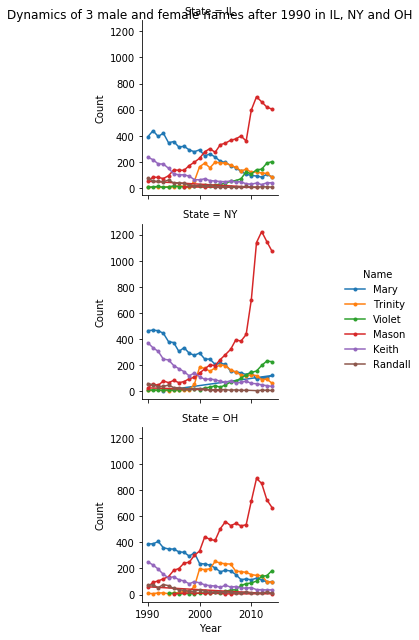

In [4]:
#HW2.3: dynamics of three names selected by you in 
#three states starting from 1990

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

main_data_set = '/Users/maryfutey/desktop/classes/python_sem2/HW2/StateNames.csv'
df = pd.read_csv(main_data_set)

states = ['IL', 'NY', 'OH']
names = ['Mary', 'Trinity', 'Violet', 'Mason', 'Keith', 'Randall']

def splitter(dataset):
    df_list = []
    for name in names:
        frame = df.loc[(df['Name'] == name) & (df['Year'] >= 1990)]
        for state in states:
            df_by_state = frame.loc[df['State'] == state]
            for d in df_by_state.to_dict('r'):
                df_list.append(d)
    return df_list

ls3 = splitter(df)

names_list = []
for l in ls3:
    if l.get('Name') not in names_list:
        names_list.append(l.get('Name'))

df3 = pd.DataFrame(ls3)

p3 = sns.FacetGrid(df3, row = "State", hue = "Name")
p3 = p3.map(plt.plot, "Year", "Count", marker = ".").add_legend()
p3.fig.suptitle("Dynamics of 3 male and female names after 1990 in IL, NY and OH")
plt.show()
